# Introduction to Data Science 
# Lecture 21: Dimensionality Reduction
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecture, we'll discuss
* dimensionality reduction 
* Principal Component Analysis (PCA)
* using PCA for visualization 

Recommended Reading:
* G. James, D. Witten, T. Hastie, and R. Tibshirani, An Introduction to Statistical Learning, Ch. 10.2 [digitial version available here](http://www-bcf.usc.edu/~gareth/ISL/)
* V. Powell, [Principal Component Analysis: Explained Visually](http://setosa.io/ev/principal-component-analysis/)


In [1]:
# imports and setup 

import numpy as np

import pandas as pd
pd.set_option('display.notebook_repr_html', False)

from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import homogeneity_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

import seaborn as sns

## Recap: Supervised vs. Unsupervised Learning

### Supervised Learning
**Data:** both the features, $x$, and a response, $y$, for each item in the dataset.

**Goal:** 'learn' how to predict the response from the features.

**Examples:**
* Regression
* Classification


### Unsupervised Learning 
**Data:** only the features, $x$, for each item in the dataset.

**Goal:** discover 'interesting' things about the dataset.

**Examples:**
* Clustering
* Dimensionality reduction, Principal Component Analysis (PCA)

## Dimensionality Reduction


In data science, [**dimensionality reduction**](https://en.wikipedia.org/wiki/Dimensionality_reduction) is the process of reducing the number of features in a dataset. 

There are two approahces to dimensionality reduction: **feature selection** and **feature extraction**.

In **feature selection**, one just picks a subset of the available features

In ** feature extraction**, the data is transformed from a high-dimensional space to a lower dimensional space. The most common method is called **principal component analysis (PCA)**, where the transformation is taken to be linear, but mnay other methods exist. In this class, we'll focus on PCA. 

**Why dimensionality reduction?**
- Remove redundancies and simplifies the dataset making it easier to understand.
- It's easier to visualize low dimensional data.
- It reduces storage space for large datasets (because of less features).
- It reduces time for computationally intensive tasks (because of less computation required).
- Reducing dimensionality can help avoid overfitting in supervised learning tasks.

## Principal Component Analysis (PCA)

**Problem:** Many datasets have too many features to be able to explore or understand in a reasonable way. Its difficult to even make a reasonable plot for a high-dimensional dataset.

**Idea**: In a [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis), we find a small number of new features, which are linear combinations of the old features, that 'explain' most of the variance in the data. The *principal component directions* are the directions in feature space in which the data is the most variable. 

Before we get into the mathematical description of Principal Component Analysis (PCA), we can gain a lot of intuition by taking a look at [this visual overview](http://setosa.io/ev/principal-component-analysis/) by Victor Powell.

**Mathematical description:** Let the $p$ features in our dataset be $x = (x_1, x_2, \ldots x_p)$. We define a new feature, the *first principal component direction*, by 
$$
z_1 = \phi_{1,1} x_1 + \phi_{2,1} x_2 + \cdots + \phi_{p,1} x_p = \phi_1^t x 
$$
Here, the coefficients $\phi_{j,1}$ are the *loadings* of the $j$-th feature on the first principal component. The vector $\phi_1 = (\phi_{1,1}, \phi_{2,1},\cdots, \phi_{p,1})$ is called the *loadings vector* for the first principal component. 

We want to find the loadings so that $z_1$ has maximal sample variance. 

Let $X$ be the $n\times p$ matrix where $X_{i,j}$ is the $j$-th feature for item $i$ in the dataset. $X$ is just the collection of the data in a matrix. 

**Important:** Assume each of the variables has been normalized to have mean zero, *i.e.*, the columns of $X$ should have zero mean. 

A short calculation shows that the sample variance of $z_1$ is then given by 
$$
Var(z_1) = \frac{1}{n} \sum_{i=1}^n \left( \sum_{j=1}^p \phi_{j,1} X_{i,j} \right)^2. 
$$
The variance can be arbitrarily large if the $\phi_{j,1}$ are allowed to be arbitrarily large. We constrain the $\phi_{j,1}$ to satisfy $\sum_{j=1}^p \phi_{j,1}^2 = 1$. In vector notation, this can be written $\| \phi_1 \| = 1$.

Putting this together, the first principal component is defined by $z_1 = \phi_1^t x$ where $\phi_1$ is the solution to the optimization problem 
\begin{align*}
\max_{\phi_1} \quad & \textrm{Var}(z_1) \\
\text{subject to} \quad & \| \phi_1\|^2 = 1. 
\end{align*}
Using linear algebra, it can be shown that $\phi_1$ is exactly the eigenvector corresponding to the largest eigenvalue of the *Gram matrix*, $X^tX$. 

We similarly define the second principal direction to be the linear combination of the features, 
$z_2 = \phi_2^t x$ with the largest variance, subject to the additional constraint that $z_2$ be uncorrelated with $z_1$. This is equivalent to $\phi_1^t \phi_2 = 0$. This corresponds to taking $\phi_2$ to be the eigenvector corresponding to the second largest eigenvalue of $X^tX$. Higher principal directions are defined analogously. 

## PCA in practice
We can use the [```PCA``` function](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from the ```sklearn.decomposition``` library. 

### Exmple: the Iris dataset

The dataset contains 4 features (attributes) of 50 samples containing 3 different types of iris plants. 

**Features (attributes):**
1. sepal length (cm) 
+ sepal width (cm) 
+ petal length (cm) 
+ petal width (cm) 

**Classes:**
1. Iris Setosa 
+ Iris Versicolour 
+ Iris Virginica

In [2]:
# import dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

### Some previous ideas for plotting the data:
1. just plot along first two dimensions and ignore other dimensions
+ plot in three dimensions (3d scatter plot) and ignore other dimensions
+ make a scatterplot matrix with all pairs of dimensions

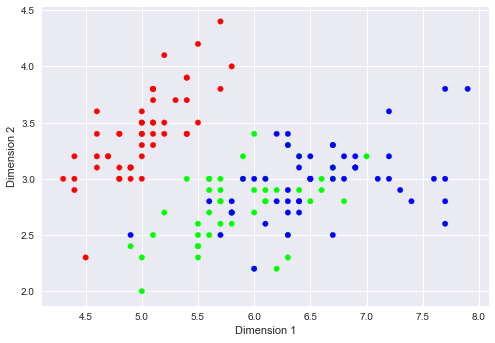

In [3]:
# plot along first two dimensions and ignore other diemtnsions

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,s=30)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

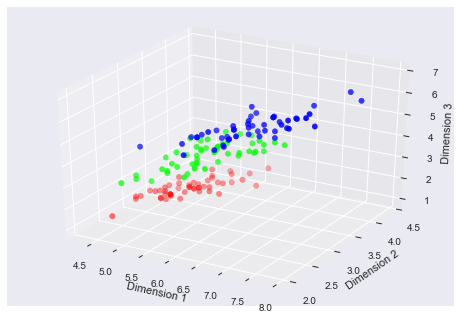

In [4]:
# 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],zs= X[:, 2], c=y, cmap=cmap_bold,s=30)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()

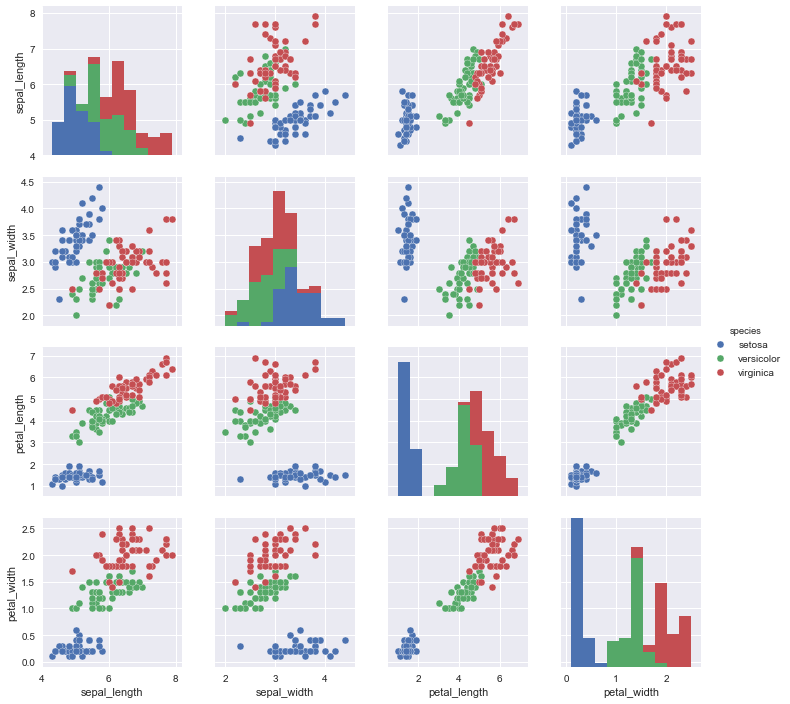

In [5]:
# scatterplot matrix
sns.set()
sns.pairplot(sns.load_dataset("iris"), hue="species");

### New idea: use PCA to plot the 2 most 'important' directions

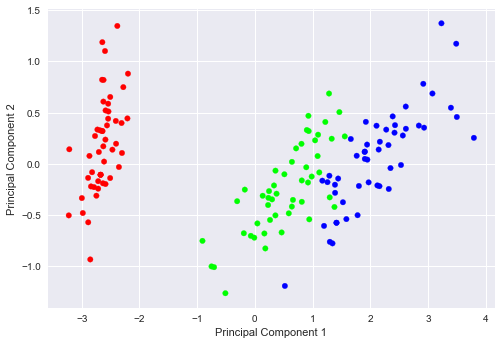

In [6]:
# PCA analysis 
pca_model = PCA()
X_PCA = pca_model.fit_transform(X)

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y, cmap=cmap_bold,s=30)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Example: use PCA to visualize cluster analysis of iris data
Principal components are very helpful for visualizing clusters.

homogeneity score for clustering is 0.795981622781


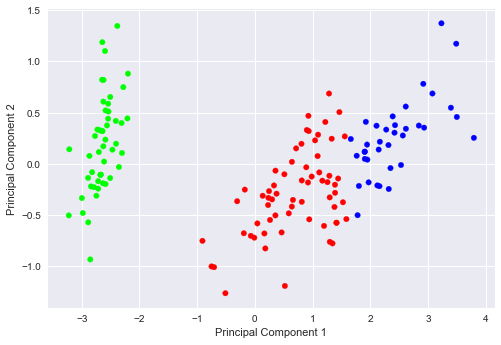

In [7]:
cluster_model = AgglomerativeClustering(linkage="average", affinity='euclidean', n_clusters=3)
y_pred = cluster_model.fit_predict(X)
h = homogeneity_score(labels_true = y, labels_pred = y_pred)
print('homogeneity score for clustering is ' + str(h))

# plot using PCA
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y_pred, cmap=cmap_bold,s=30)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Number of principal components

For plotting the data, we generally just use the first 2 principal components. In other applications requiring dimensionality reduction, you might want to indentify the number of principal components that can be used to explain the data. This can be done by considering the percentatge of variance explained by each component or a *scree plot*. 

[ 0.92461621  0.05301557  0.01718514  0.00518309]


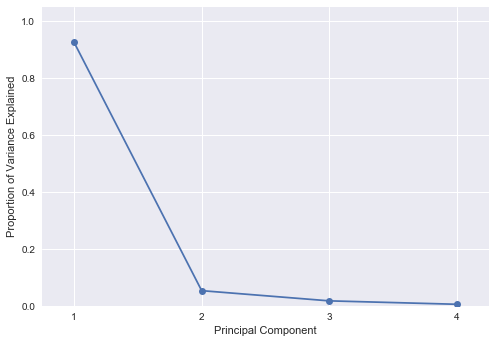

In [8]:
# Variance ratio of the four principal components
var_ratio = pca_model.explained_variance_ratio_
print(var_ratio)

plt.plot([1,2,3,4], var_ratio, '-o')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.show()

## Example: visualizing clusters in the MNIST handwritten digit dataset

THE MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. 

Becaue both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various methods. 
For example, [this webpage](http://yann.lecun.com/exdb/mnist/) describes a variety of different classification results on MNIST (Note, the tests on this website are for a larger and higher resolution dataset than we'll use.) To see a comparison of classification methods implemented in scikit-learn on the MNIST dataset, see 
[this page](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).
The MNIST dataset is also a frequently used for benchmarking clustering algorithms and because it has labels, we can evaluate the homogeneity or purity of the clusters. 

There are several versions of the dataset. We'll use the one that is built-in to scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10  
* Samples per class: $\approx$180
* Samples total: 1797
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">


<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


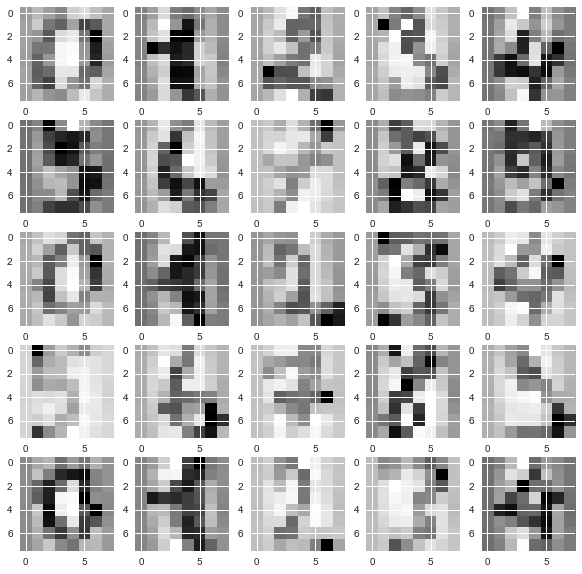

In [9]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

plt.figure(figsize= (10, 10))
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='none')
plt.show()

Here we'll use PCA to visualize the results of a clustering of the MNIST dataset.

This example was taken from the [scikit-learn examples](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html).

0.456300263584


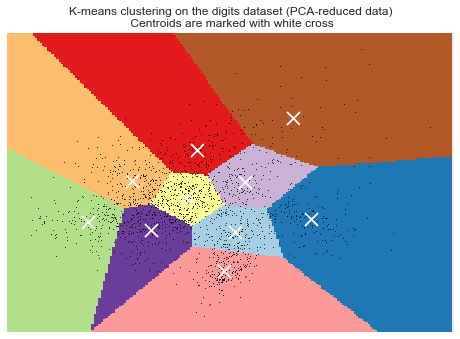

In [10]:
X_PCA = PCA(n_components=2).fit_transform(X)

kmeans_model = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans_model.fit(X_PCA)

print(metrics.homogeneity_score(labels_true=y, labels_pred=kmeans_model.labels_))

# Plot the decision boundaries. For that, we will assign a color to each point in a mesh
x_min, x_max = X_PCA[:, 0].min() - 1, X_PCA[:, 0].max() + 1
y_min, y_max = X_PCA[:, 1].min() - 1, X_PCA[:, 1].max() + 1
h = .1     # step size of the mesh .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh.
Z = kmeans_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_PCA[:, 0], X_PCA[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmeans_model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


## Example: Analyze US Arrests dataset

In HW8, you were asked to analyze the US Arrests dataset.

This dataset describes 1973 violent crime rates by US State. The crimes considered are assault, murder, and rape. Also included is the percent of the population living in urban areas.

The dataset is available as *USarrests.csv*. The dataset has 50 observations (corresponding to each state) on 4 variables: 
1. Murder: Murder arrests (per 100,000 residents)
2. Assault: Assault arrests (per 100,000 residents)
3. UrbanPop: Percent urban population
4. Rape: Rape arrests (per 100,000 residents)

You can read more about the dataset [here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html). 

In HW8, you used clustering tools to understand how violent crimes differ between states. But it was difficult to visualize the results. Here, we'll use PCA to do this. 

(50, 4)
            Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6
            Murder   Assault  UrbanPop      Rape
Murder    1.000000  0.801873  0.069573  0.563579
Assault   0.801873  1.000000  0.258872  0.665241
UrbanPop  0.069573  0.258872  1.000000  0.411341
Rape      0.563579  0.665241  0.411341  1.000000


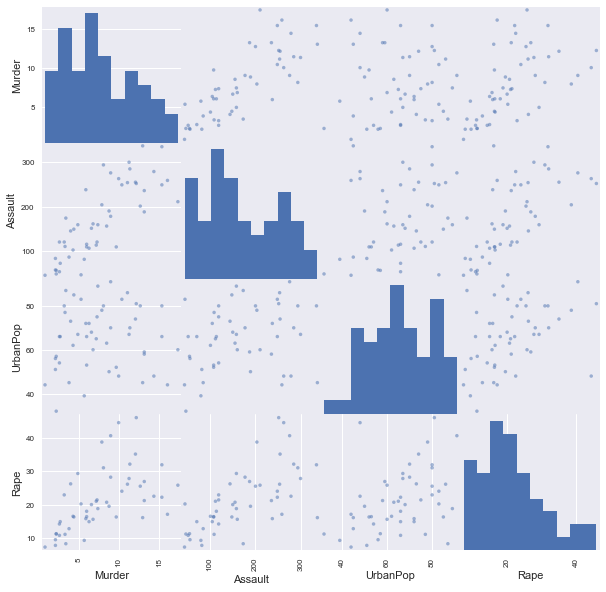

In [11]:
crime = pd.read_csv('USArrests.csv', index_col=0)

print(crime.shape)
print(crime.head())

# correlations and scatter plot matrix
print(crime.corr())
pd.plotting.scatter_matrix(crime, figsize=(10, 10), diagonal='hist'); 

### Principal Component Analysis (PCA) 

We visualize the data by performing the following steps:
1. Scale the dataset using the *scale* function of the sklearn.preprocessing library. 
+ Calculate the principal components of the dataset. 
+  Store the principal components in a pandas dataframe. 
+ Plot a scatterplot of PC1 and PC2. Using the matplotlib function *annotate*, use the state names as markers (instead of dots).
+ Print the explained variance ratio of the PCA. Plot the explained variace ratio of the PCA. Interpret these values. Is it reasonable to reduce the four dimensional space to two dimensions using PCA? 

In [12]:
# scale the dataset
X = scale(crime)

# find PCA and transform to new coordinates
pca_model = PCA()
X_PCA = pca_model.fit_transform(X)

# create a new pandas dataframe 
df_plot = pd.DataFrame(X_PCA, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=crime.index)
df_plot.head()

                 PC1       PC2       PC3       PC4
Alabama     0.985566  1.133392 -0.444269  0.156267
Alaska      1.950138  1.073213  2.040003 -0.438583
Arizona     1.763164 -0.745957  0.054781 -0.834653
Arkansas   -0.141420  1.119797  0.114574 -0.182811
California  2.523980 -1.542934  0.598557 -0.341996

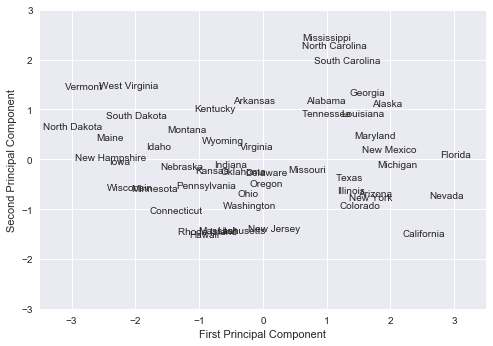

In [13]:
fig,ax1 = plt.subplots()

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3,3)

# Plot Principal Components 1 and 2
for i,name in enumerate(crime.index):
    ax1.annotate(name, (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=10)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

[ 0.62006039  0.24744129  0.0891408   0.04335752]


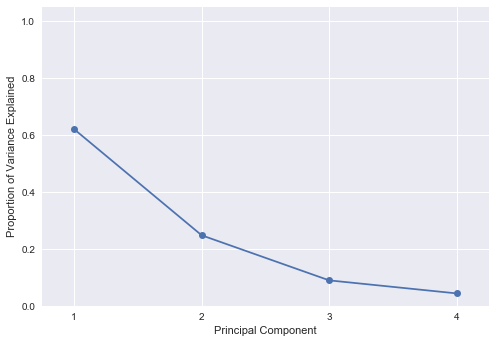

In [14]:
# Variance ratio of the four principal components
var_ratio = pca_model.explained_variance_ratio_
print(var_ratio)

plt.plot([1,2,3,4], var_ratio, '-o')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.show()

87% of the variance is explained in the first two principle components so not much information is lost when reducing from four to two dimensions. 

### Exercise: visualizing a k-means cluster analysis
1. Using k-means, cluster the states into $k=4$ clusters. 
+ Use the principal components to plot the clusters. Again label each point using the state name and this time color the states according to cluster.

In [15]:
# Your solution here


In [16]:
# Reference solution

k_means_model = KMeans(n_clusters=4,n_init=100)
y_pred = k_means_model.fit_predict(X)

print(pd.Series(k_means_model.labels_).value_counts())
for i in np.arange(4):
    print(crime.index[y_pred==i])

0    16
2    13
1    13
3     8
dtype: int64
Index(['Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas',
       'Massachusetts', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington',
       'Wyoming'],
      dtype='object')
Index(['Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Illinois',
       'Maryland', 'Michigan', 'Missouri', 'Nevada', 'New Mexico', 'New York',
       'Texas'],
      dtype='object')
Index(['Idaho', 'Iowa', 'Kentucky', 'Maine', 'Minnesota', 'Montana',
       'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont',
       'West Virginia', 'Wisconsin'],
      dtype='object')
Index(['Alabama', 'Arkansas', 'Georgia', 'Louisiana', 'Mississippi',
       'North Carolina', 'South Carolina', 'Tennessee'],
      dtype='object')


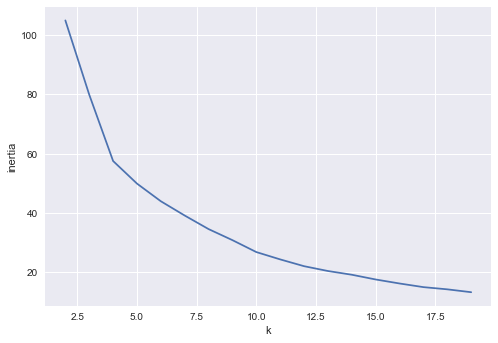

In [17]:
k_vals = np.arange(2,20)
inert = np.zeros(len(k_vals))
for ii,k in enumerate(k_vals):
    m = KMeans(n_clusters=k,n_init=100)
    m.fit_predict(X)
    inert[ii] = m.inertia_

plt.plot(k_vals,inert)
plt.ylabel('inertia')
plt.xlabel('k')
plt.show()


Because of the 'elbow' in the inertia at k=4, I would say four clusters is a good number. 

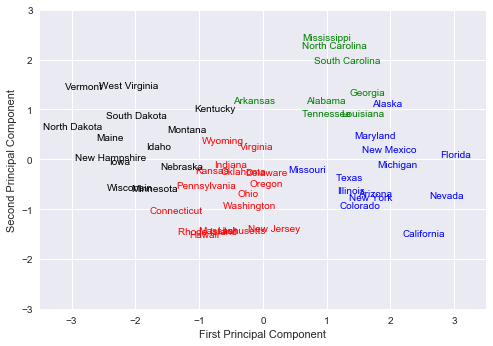

In [18]:
fig,ax1 = plt.subplots()

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3,3)

cs = ['red','blue','black','green']

# Plot Principal Components 1 and 2
for i,name in enumerate(crime.index):
    ax1.f(name, (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=10,color=cs[y_pred[i]],)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()